In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

### Gerando um dataset toy

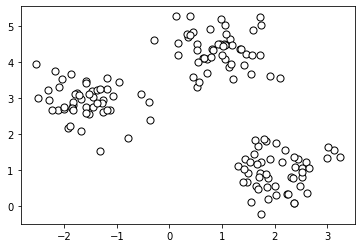

In [3]:
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

### Convertendo em DataFrame

In [4]:
cluster_df = pd.DataFrame(X,columns=['X','y'])

In [5]:
cluster_df

,X,y
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698
...,...,...
145,-2.238934,2.671222
146,-1.872929,3.686071
147,-1.889703,2.226200
148,2.253271,0.351133


### Plotando Davies-Bouldin score

In [6]:
def get_kmeans_score(data, center):
    
    kmeans = KMeans(n_clusters=center, init='k-means++')
    model = kmeans.fit_predict(cluster_df)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(cluster_df, model)
    
    return score

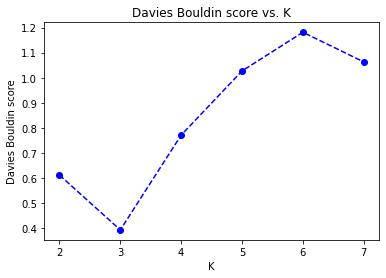

In [7]:
scores = []
centers = list(range(2,8))
for center in centers:
    scores.append(get_kmeans_score(cluster_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

### Plotando Dendograma

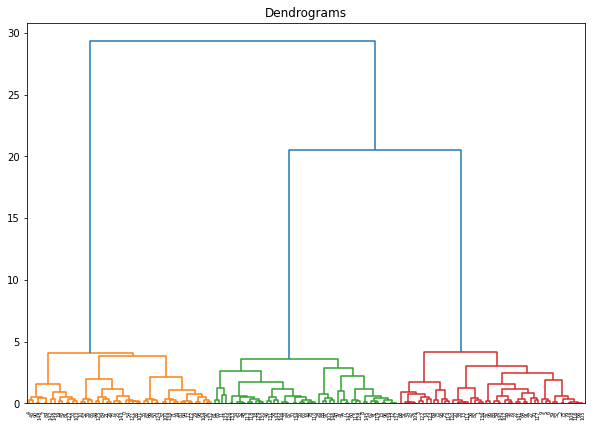

In [8]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cluster_df, method='ward'))

## Analisando os centróides de acordo com Davies-Bouldin (DB score) 

In [9]:
def kmeans_(X, n_cluster):
    km = KMeans(
        n_clusters=n_cluster, init='k-means++'
    )

    y_km = km.fit_predict(X)
    
    for i in range(n_cluster):
        plt.scatter(
            X[y_km == i, 0], X[y_km == i, 1],
            #s=50, c='lightgreen',
            #marker='s', edgecolor='black',
            label='cluster '+str(i)
        )
    
    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

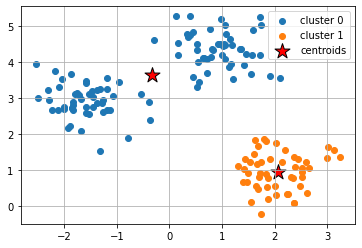

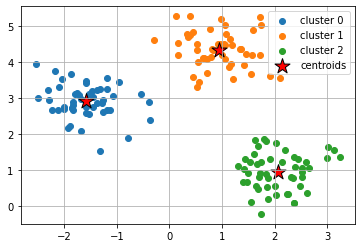

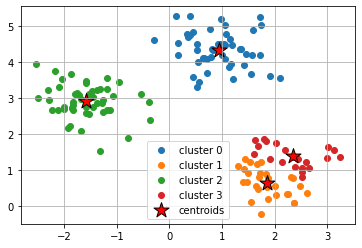

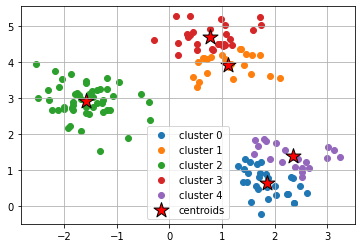

In [10]:
for i in range(2,6):
    kmeans_(X, i)